# Δ‑Wave Explorer (v2) — Robust Visualiser

Self‑contained Colab notebook that:

1. Computes Δ(n) = |(i/2ⁿ)² − C| for **φ, π, α, √3 / π**, and three harmonic ratios (1/H₂…1/H₄).  
2. Plots **log₁₀ Δ vs n** (auto‑casts all values to floats).  
3. Plots **hit‑density vs ε** for ε ∈ [1e‑2, 1e‑15].  
4. Saves a CSV `delta_curves_<timestamp>.csv` with every Δ(n).

Open → Run all → done in < 5 s on a Colab CPU.


In [1]:
# ⬇️ Imports & parameters
import mpmath as mp, pandas as pd, numpy as np, matplotlib.pyplot as plt, time, itertools
mp.mp.dps = 40   # 128‑bit precision

MAX_BITS = 45
BASE_CONSTANTS = [
    ('phi',   (1 + mp.sqrt(5))/2),
    ('pi',    mp.pi),
    ('alpha', mp.mpf(1)/mp.mpf('137.035999')),
    ('sqrt3_pi', mp.sqrt(3)/mp.pi),
]

# Add a few harmonic ratios (and their labels)
def H(n): return mp.nsum(lambda k: 1/mp.mpf(k), [1, n])

BASE_CONSTANTS += [('harm_'+str(i), 1/H(i)) for i in range(2,5)]

print('Scanning constants:', [name for name,_ in BASE_CONSTANTS])


Scanning constants: ['phi', 'pi', 'alpha', 'sqrt3_pi', 'harm_2', 'harm_3', 'harm_4']


In [2]:
# ⚙️ Δ(n) computation
def delta_curve(C, max_bits=MAX_BITS):
    sqrtC = mp.sqrt(C)
    ns, deltas = [], []
    for n in range(1, max_bits+1):
        denom = mp.mpf(1 << n)
        i     = mp.nint(sqrtC * denom)
        val   = (i / denom) ** 2
        deltas.append(abs(val - C))
        ns.append(n)
    # cast to floats for numpy
    return np.array(ns, dtype=int), np.array([float(d) for d in deltas], dtype=float)

curves = {name: delta_curve(c) for name,c in BASE_CONSTANTS}
print('Δ curves computed.')


Δ curves computed.


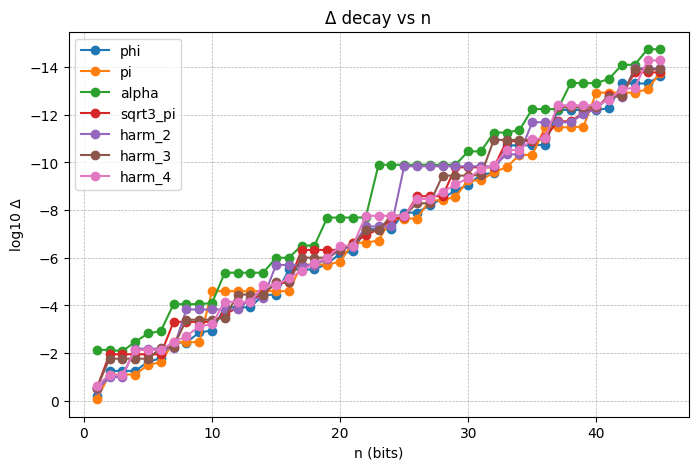

In [3]:
# 📈 Plot log10 Δ vs n
plt.figure(figsize=(8,5))
for name,(n,delta) in curves.items():
    plt.plot(n, np.log10(delta), marker='o', label=name)
plt.gca().invert_yaxis()
plt.xlabel('n (bits)'); plt.ylabel('log10 Δ'); plt.title('Δ decay vs n')
plt.grid(True, which='both', ls='--', lw=0.5)
plt.legend(); plt.show()


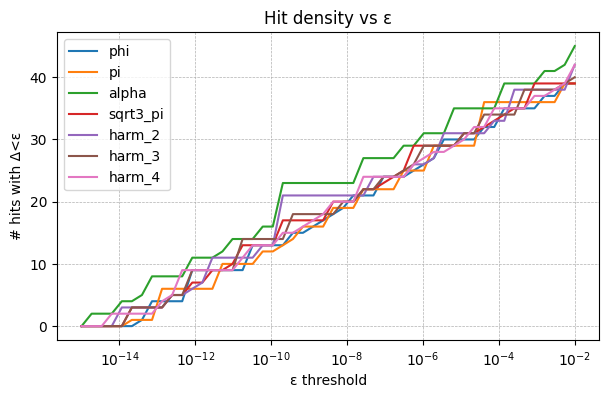

In [4]:
# 📉 Hit‑density curve
eps_range = np.logspace(-2, -15, 50)
plt.figure(figsize=(7,4))
for name,(n,delta) in curves.items():
    counts = [(delta < eps).sum() for eps in eps_range]
    plt.plot(eps_range, counts, label=name)
plt.xscale('log'); plt.xlabel('ε threshold'); plt.ylabel('# hits with Δ<ε')
plt.title('Hit density vs ε'); plt.grid(True, which='both', ls='--', lw=0.5)
plt.legend(); plt.show()


In [5]:
# 💾 Export CSV
rows=[]
for name,(n,delta) in curves.items():
    for nn,dd in zip(n,delta):
        rows.append((name, nn, dd))
df = pd.DataFrame(rows, columns=['constant','n','delta'])
fname = f'delta_curves_{time.strftime("%Y%m%d_%H%M%S")}.csv'
df.to_csv(fname, index=False)
print('Saved:', fname)


Saved: delta_curves_20250716_104857.csv
